In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

filepath = 'C:\\Users\\harry\\OneDrive\\!University\\3. Third\\AerodynamicsPropulsion\\2D Aerofoil\\Part 2\\'
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Part 3

Load the `NACA 0010` aerofoil data into an array.

In [2]:
Foil = np.array(pd.read_excel(filepath+'NACA0010.xlsx'))

Plot of the existing, symmetric aerofoil.

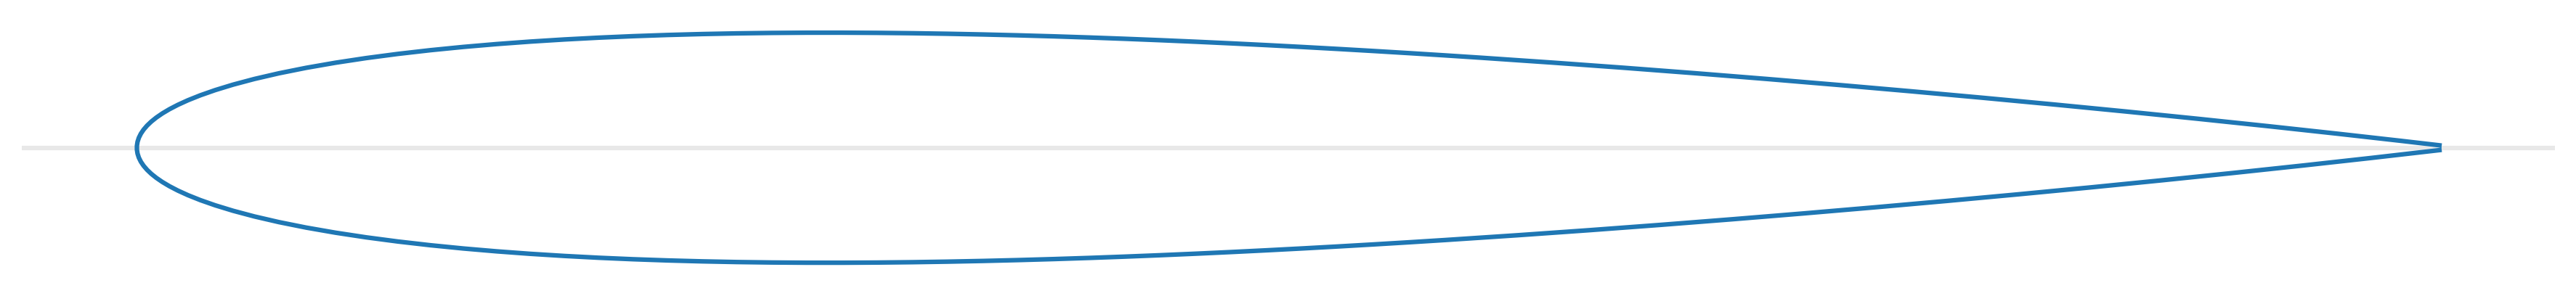

In [3]:
fig, ax = plt.subplots(dpi=300, figsize=(15,2), facecolor='white')
ax.plot(Foil[:,0], Foil[:,1])
ax.axhline(0,c='#d3d3d3', zorder=0, alpha=0.5)
ax.set_aspect(1)
ax.axis('Off');

I require the aerofoil in a 9% thick and 12% thick configuration.

In [4]:
Foil9, Foil12 = np.copy(Foil), np.copy(Foil)
Foil9[:,1] *= 0.9
Foil12[:,1] *= 1.2

Plot the 9%, 10% and 12% thick aerofoils.

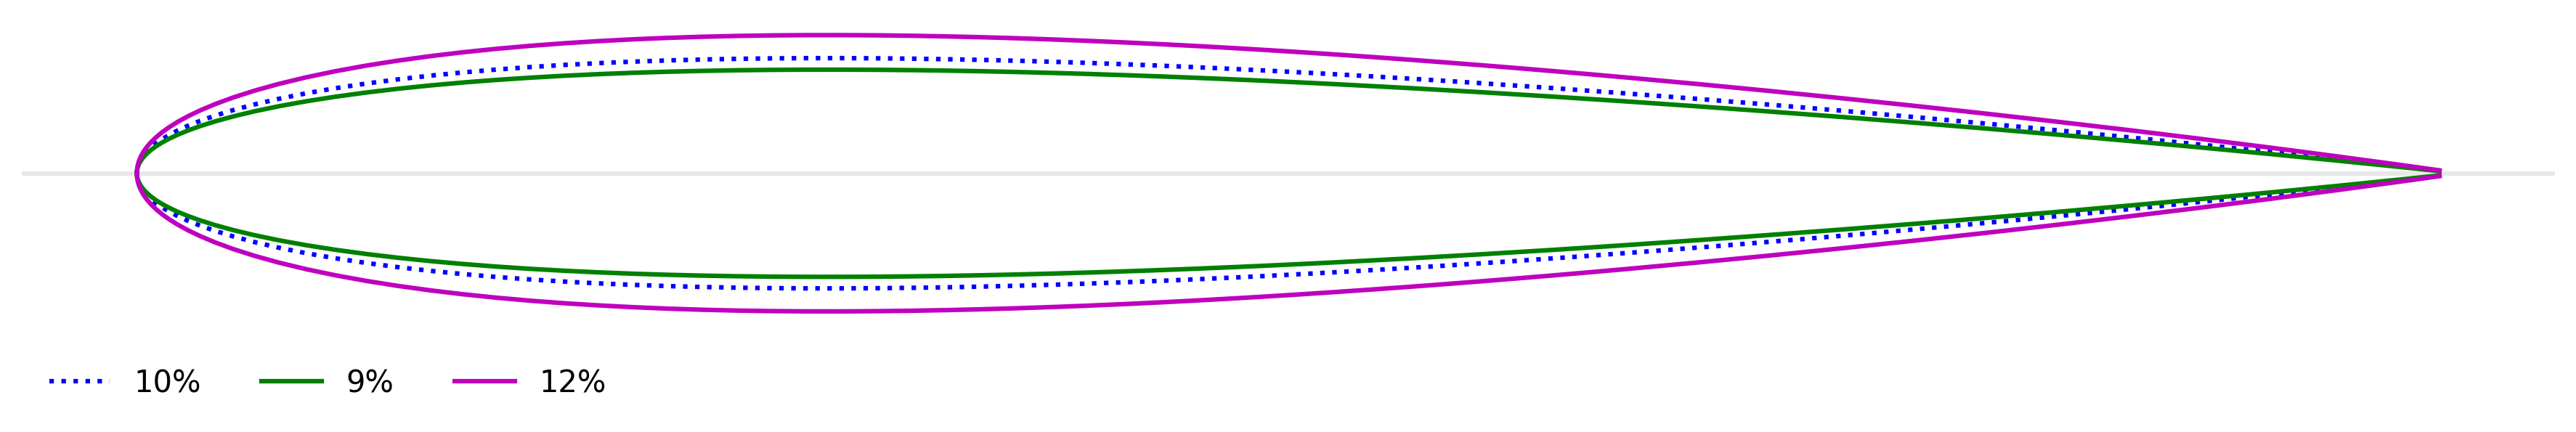

In [5]:
fig, ax = plt.subplots(dpi=300, figsize=(15,2), facecolor='white')
ax.plot(Foil[:,0], Foil[:,1], 'b:', label='10%')
ax.plot(Foil9[:,0], Foil9[:,1], 'g', label='9%')
ax.plot(Foil12[:,0], Foil12[:,1], 'm', label='12%')
ax.axhline(0,c='#d3d3d3', zorder=0, alpha=0.5)
ax.set_aspect(1)
ax.axis('Off')
ax.legend(frameon=False, ncol=3, loc='upper left', bbox_to_anchor=(0, -0.05));

Function for creating a camber line with given maximum camber and location of maximum camber. Also create functions to get the $y$ value fora given $y$ value, necessary for altering the existing aerofoil.

In [6]:
def camber_plot(max_c,x_max):
    global x
    global y
    x = np.arange(0,1,0.001)
    y = []
    x_max=x_max/100
    max_c=max_c/100
    for i in range(len(x)):
        if x[i]<(x_max):
            y.append(max_c*(2*(x[i]/x_max)-pow((x[i]/x_max),2)))
        else:
            y.append(max_c*(2*((1-x[i])/(1-x_max))-pow(((1-x[i])/(1-x_max)),2)))
    
    max_y = max(y)
    max_x = x[y.index(max(y))]
    
    fig, ax = plt.subplots(dpi=300, figsize=(15,2), facecolor='white')
    ax.plot(x,y, c='orange')
    ax.axis('Off')

    ax.axhline(0, c='#d3d3d3', alpha=0.5, zorder=0)
    ax.set_aspect(1)

def get_y(x_loc, x_max=0.28, max_c=0.025):
    if x_loc<(x_max):
        y = max_c*(2*(x_loc/x_max)-pow((x_loc/x_max),2))
    else:
        y = max_c*(2*((1-x_loc)/(1-x_max))-pow(((1-x_loc)/(1-x_max)),2))
        
    return y

Camber plot for my individual test case: maximum camber of 2.5% at 28% chord.

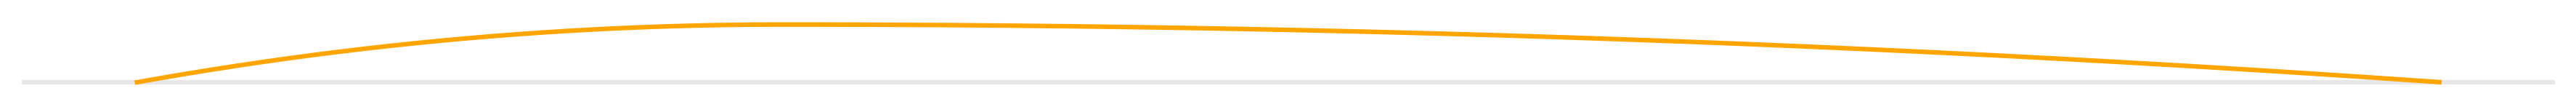

In [7]:
camber_plot(2.5,28)

For each $x$ location of the aerofoil, add the corresponding camber value.

In [8]:
for i in range(len(Foil)):
    Foil[i][1] += get_y(Foil[i][0])
    Foil9[i][1] += get_y(Foil9[i][0])
    Foil12[i][1] += get_y(Foil12[i][0])

Plot the resulting aerofoil.

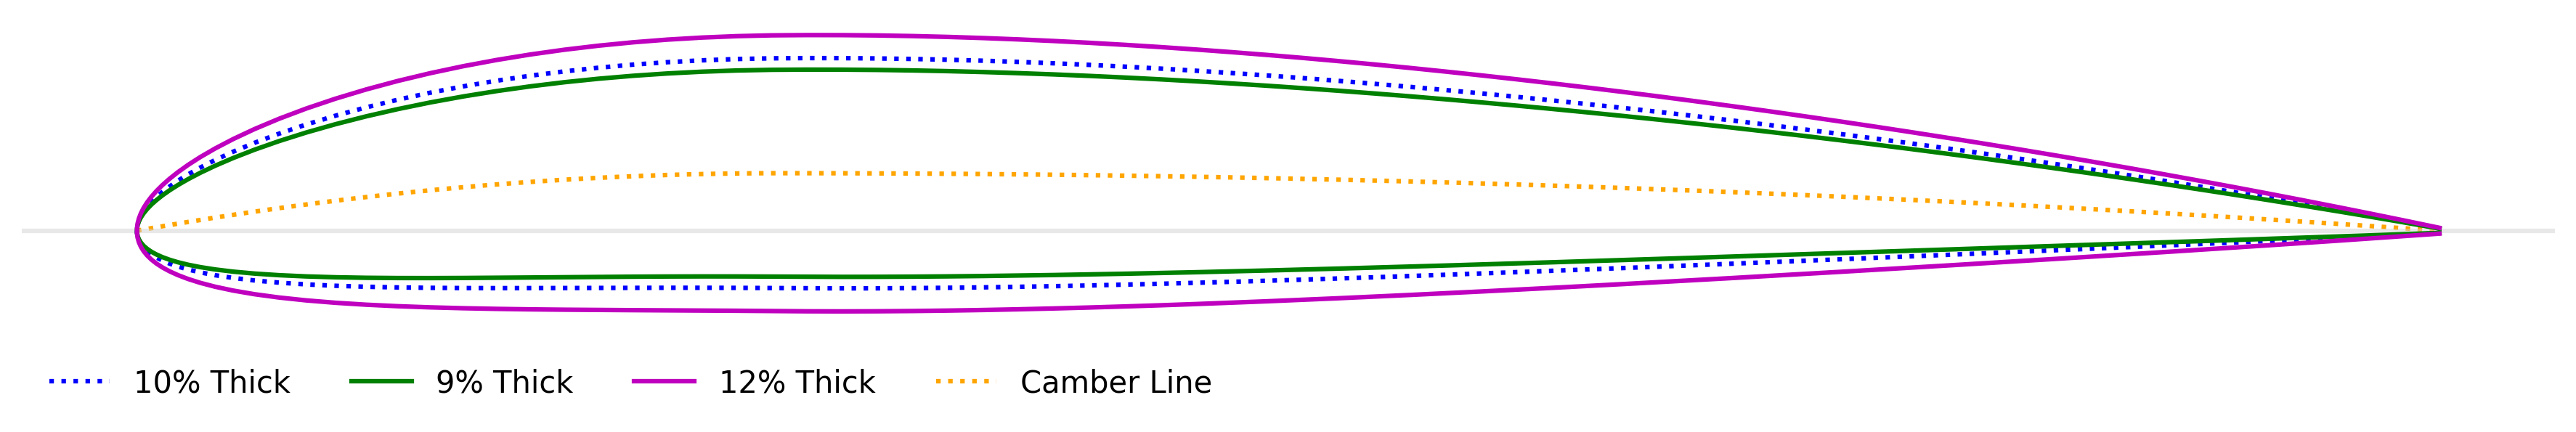

In [9]:
fig, ax = plt.subplots(dpi=300, figsize=(15,2), facecolor='white')

ax.plot(Foil[:,0], Foil[:,1], 'b:', label='10% Thick')
ax.plot(Foil9[:,0], Foil9[:,1], 'g', label='9% Thick')
ax.plot(Foil12[:,0], Foil12[:,1], 'm', label='12% Thick')

ax.plot(x,y, c='orange', zorder=0, linestyle=':', label='Camber Line')
ax.axhline(0,c='#d3d3d3', zorder=0, alpha=0.5)
ax.set_aspect(1)
ax.legend(frameon=False, ncol=4, loc='upper left', bbox_to_anchor=(0, -0.05))
ax.axis('Off');

We can compare this result to the aerofoil generated by the popular aerofoil site `airfoiltools.com`.

In [10]:
Real = np.array(pd.read_csv(filepath+'NACA2210.csv'))
Real *= 0.01

Plot the calculated and existing aerofoils.

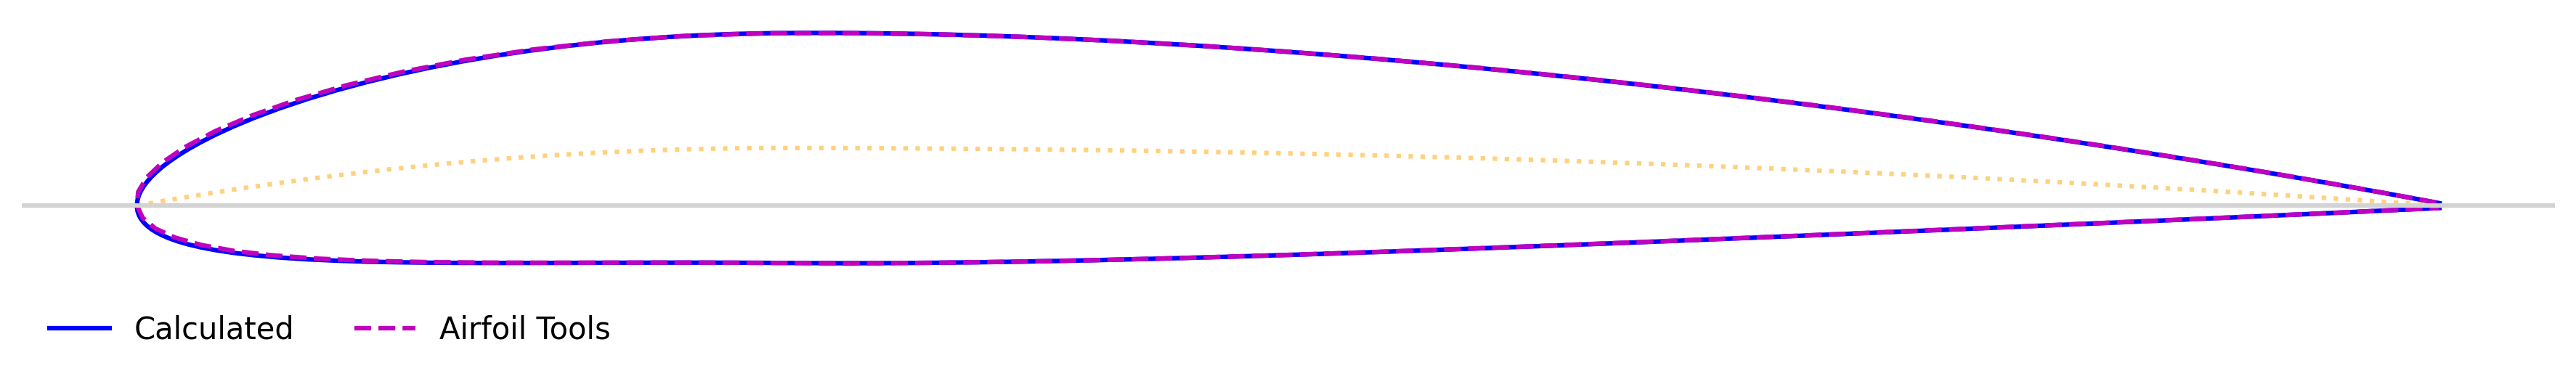

In [11]:
fig, ax = plt.subplots(dpi=300, figsize=(15,2), facecolor='white')

ax.plot(Foil[:,0], Foil[:,1], 'b', label='Calculated')
ax.plot(Real[:,0], Real[:,1], 'm--', label='Airfoil Tools')
ax.plot(x,y, c='orange', zorder=0, alpha=0.5, linestyle=':')
ax.axhline(0, c='#d3d3d3')
ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(0, -0.05), ncol=2)
ax.set_aspect(1)
ax.axis('Off');

To make use of this aerofoil in external tools such as `XFOIL` we can export the coordinates of the new aerofoil designs.

In [12]:
np.savetxt(filepath+'10Percent.prn', Foil, delimiter=' ')
np.savetxt(filepath+'12Percent.prn', Foil12, delimiter=' ')
np.savetxt(filepath+'9Percent.prn', Foil9, delimiter=' ')

# Part 4

Once the data has been collected usin `XFOIL` we can input the data and being the processing.

In [28]:
Data2209 = pd.read_csv(filepath+'2209_Polar.txt', skiprows=10, delim_whitespace=True)
Data2210 = pd.read_csv(filepath+'2210_Polar.txt', skiprows=10, delim_whitespace=True)
Data2212 = pd.read_csv(filepath+'2212_Polar.txt', skiprows=10, delim_whitespace=True)
#Remove the dashed header line.
Data2209.drop([0], inplace=True)
Data2210.drop([0], inplace=True)
Data2212.drop([0], inplace=True)
#Set data type of all items to float.
Data2209 = Data2209.astype(float)
Data2210 = Data2210.astype(float)
Data2212 = Data2212.astype(float)

Create plots of $C_L$ and $C_M$ against $\alpha$ and highlight the location of $\alpha_0$.

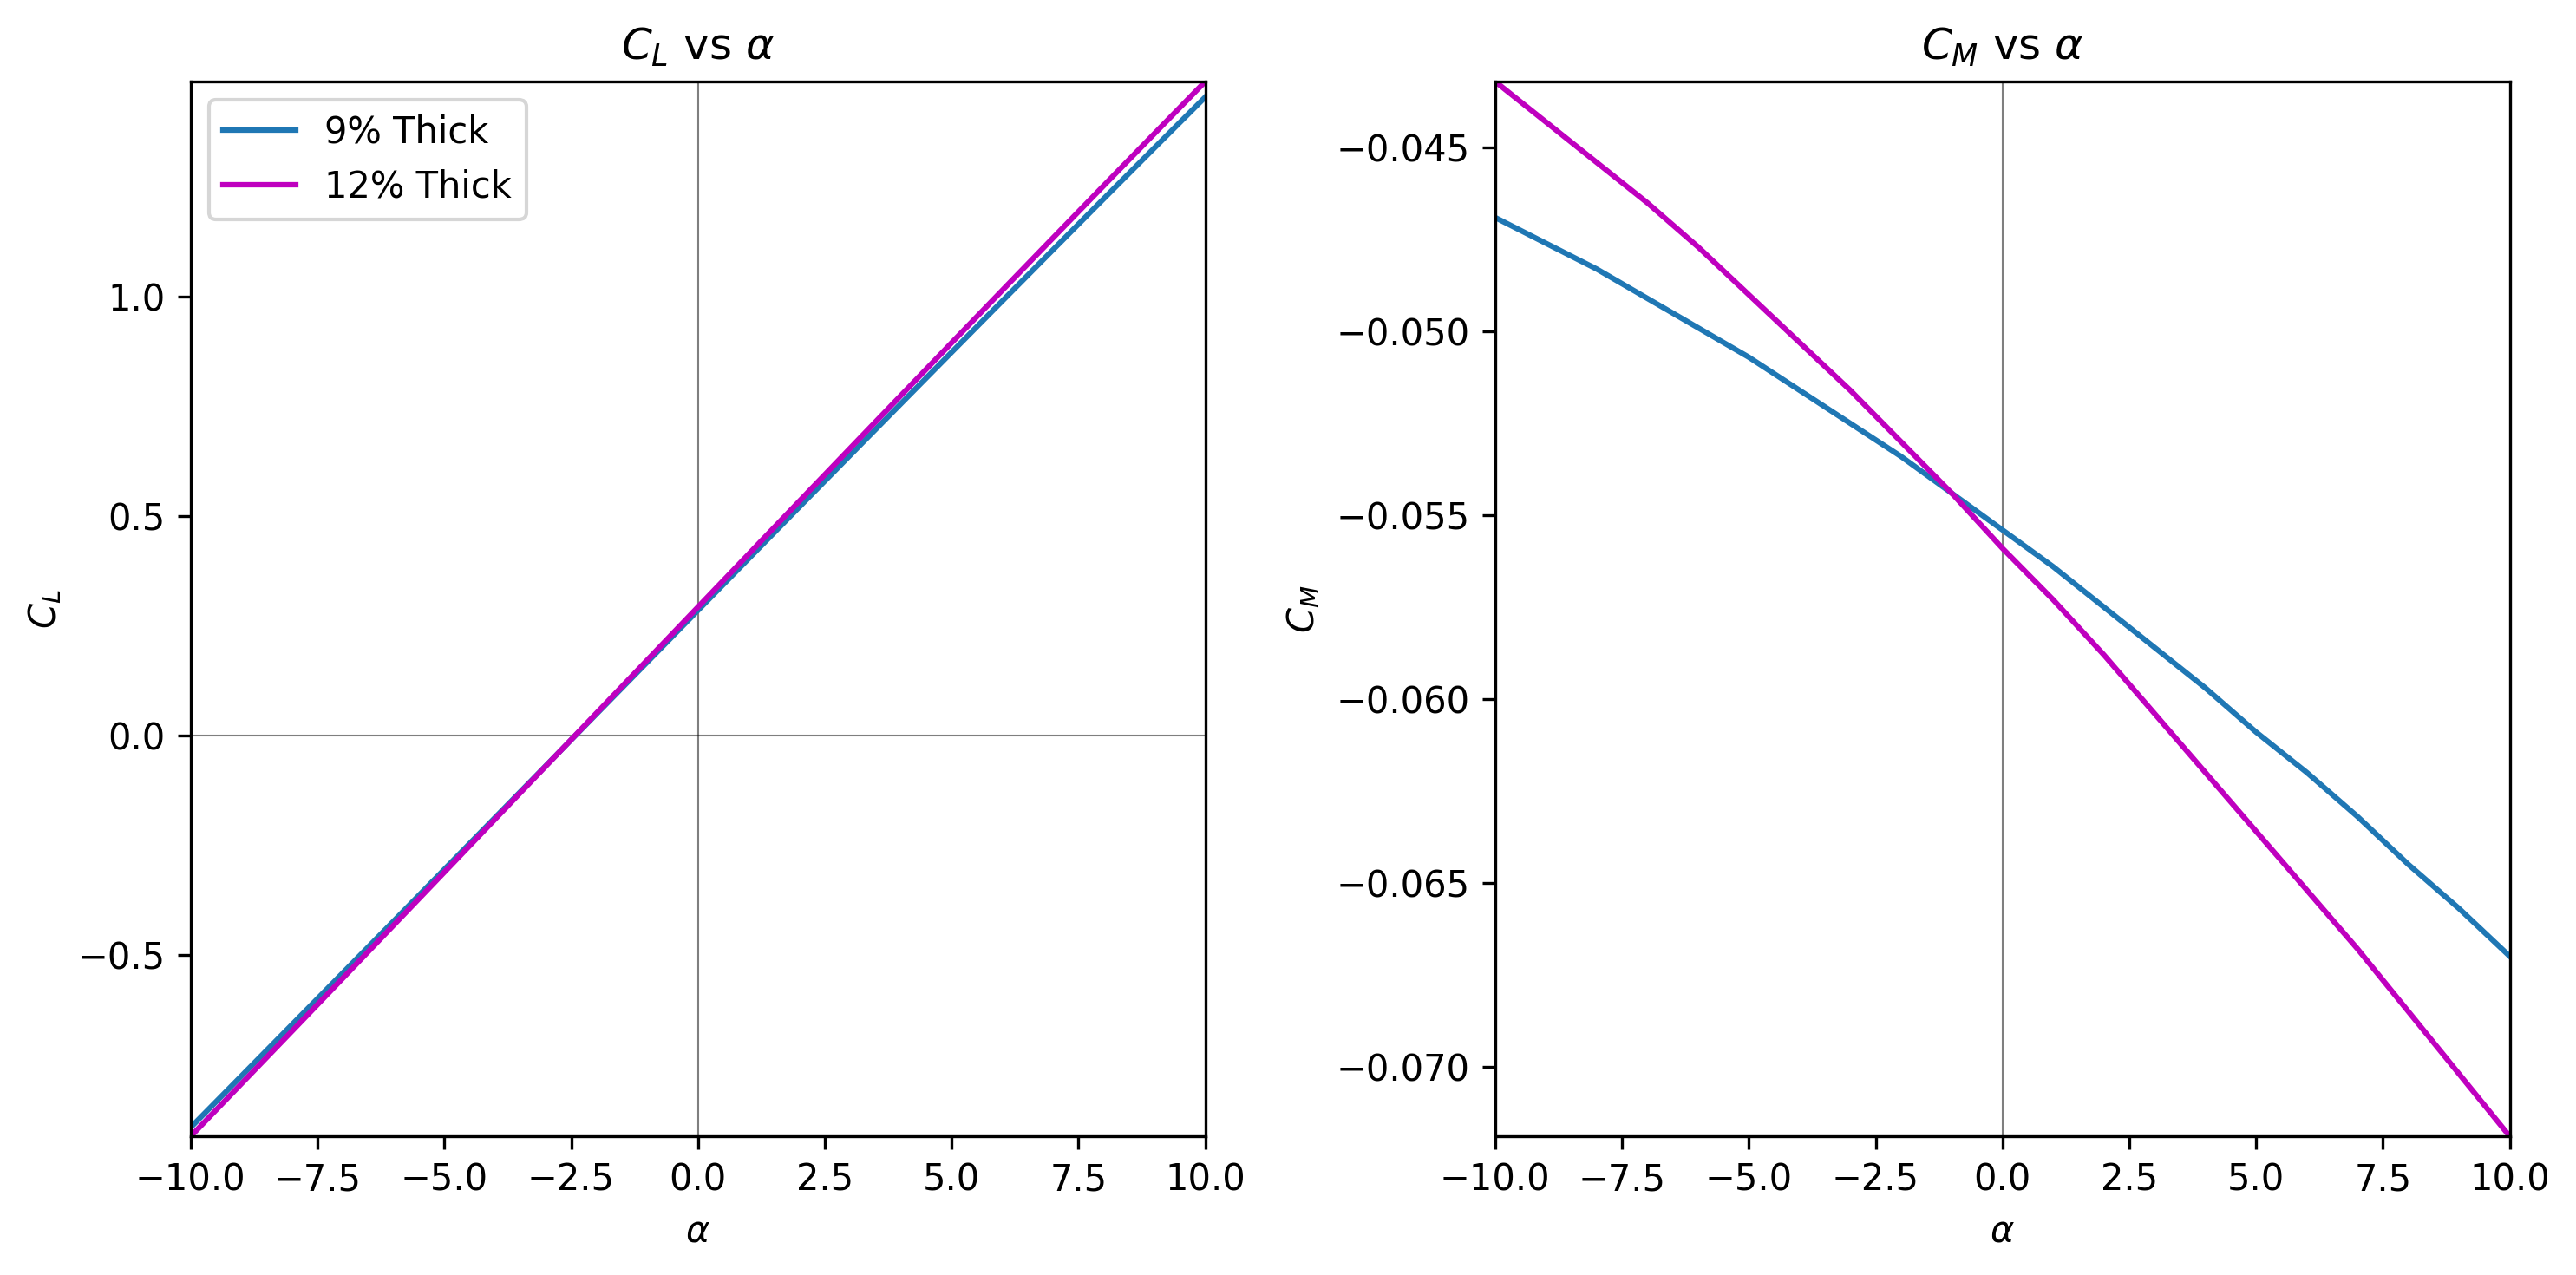

In [29]:
fig, axs = plt.subplots(1,2, figsize=(10,5), dpi=300, facecolor='white')
#C_L Plots
axs[0].plot(Data2209['alpha'], Data2209['CL'], label='9% Thick')
axs[0].plot(Data2212['alpha'], Data2212['CL'], c='m', label='12% Thick')
#C_M Plots
axs[1].plot(Data2209['alpha'], Data2209['CM'], label='9% Thick')
axs[1].plot(Data2212['alpha'], Data2212['CM'], c='m', label='12% Thick')
#Formatting
axs[0].legend(frameon=True)
axs[0].axhline(0, c='k', lw=0.5, zorder=0, alpha=0.5), axs[0].axvline(0, c='k', lw=0.5, zorder=0, alpha=0.5)
axs[1].axvline(0, c='k', lw=0.5, zorder=0, alpha=0.5)
axs[0].set_title(r'$C_L$ vs $\alpha$')
axs[1].set_title(r'$C_M$ vs $\alpha$')

axs[0].set_xlabel(r'$\alpha$'), axs[1].set_xlabel(r'$\alpha$')
axs[0].set_ylabel(r'$C_L$'), axs[1].set_ylabel(r'$C_M$')
axs[0].margins(0), axs[1].margins(0)
plt.tight_layout();

$\alpha_0$ is the angle of incidence producing zero lift. By considering the straight line equation we can calculate the value of $\alpha_0$ for each aerofoil.

In [42]:
alpha_zero_9=-np.polyfit(Data2209['alpha'],Data2209['CL'],1)[1]/np.polyfit(Data2209['alpha'],Data2209['CL'],1)[0]
alpha_zero_12=-np.polyfit(Data2212['alpha'],Data2212['CL'],1)[1]/np.polyfit(Data2212['alpha'],Data2212['CL'],1)[0]

The result is that the 9% thick aerofoil has an $\alpha_0$ of {{round(alpha_zero_9,3)}} degrees and the 12% thick aerofoil an $\alpha_0$ of {{"%.3f" % alpha_zero_12}} degrees, or {{"%.4f" %np.radians(alpha_zero_9)}} and {{"%.4f" % np.radians(alpha_zero_12)}} radians. For reference, the theoretical result from part one was -2.364 degrees.

For the quarter chord pitching moment we will consider the aerofoil under the zero lift condition: at the angle of incidence calculated above.

First we will generate the spline curve that fits the data points we have. This will be done using the interpolation package from `SciPy`. With the spline curve fit to the data poits we can consider the values of $C_M$ at $\alpha_0$ for the 9% and 12% thick aerofoils.

In [40]:
tck_9  = interpolate.splrep(Data2209['alpha'], Data2209['CM'], s=1, k=3)
tck_12 = interpolate.splrep(Data2212['alpha'], Data2212['CM'], s=1, k=3)

xnew = np.arange(-10, 10, 1/1000)
ynew_9 = interpolate.splev(xnew, tck_9, der=0)
ynew_12 = interpolate.splev(xnew, tck_12, der=0)

pitching_9 = interpolate.splev(alpha_zero_9, tck_9, der=0)
pitching_12 = interpolate.splev(alpha_zero_12, tck_12, der=0)

Below you can see the resulting spline curves and the original data points to which they fit. Also marked are the locations of $C_M$ at $\alpha_0$.

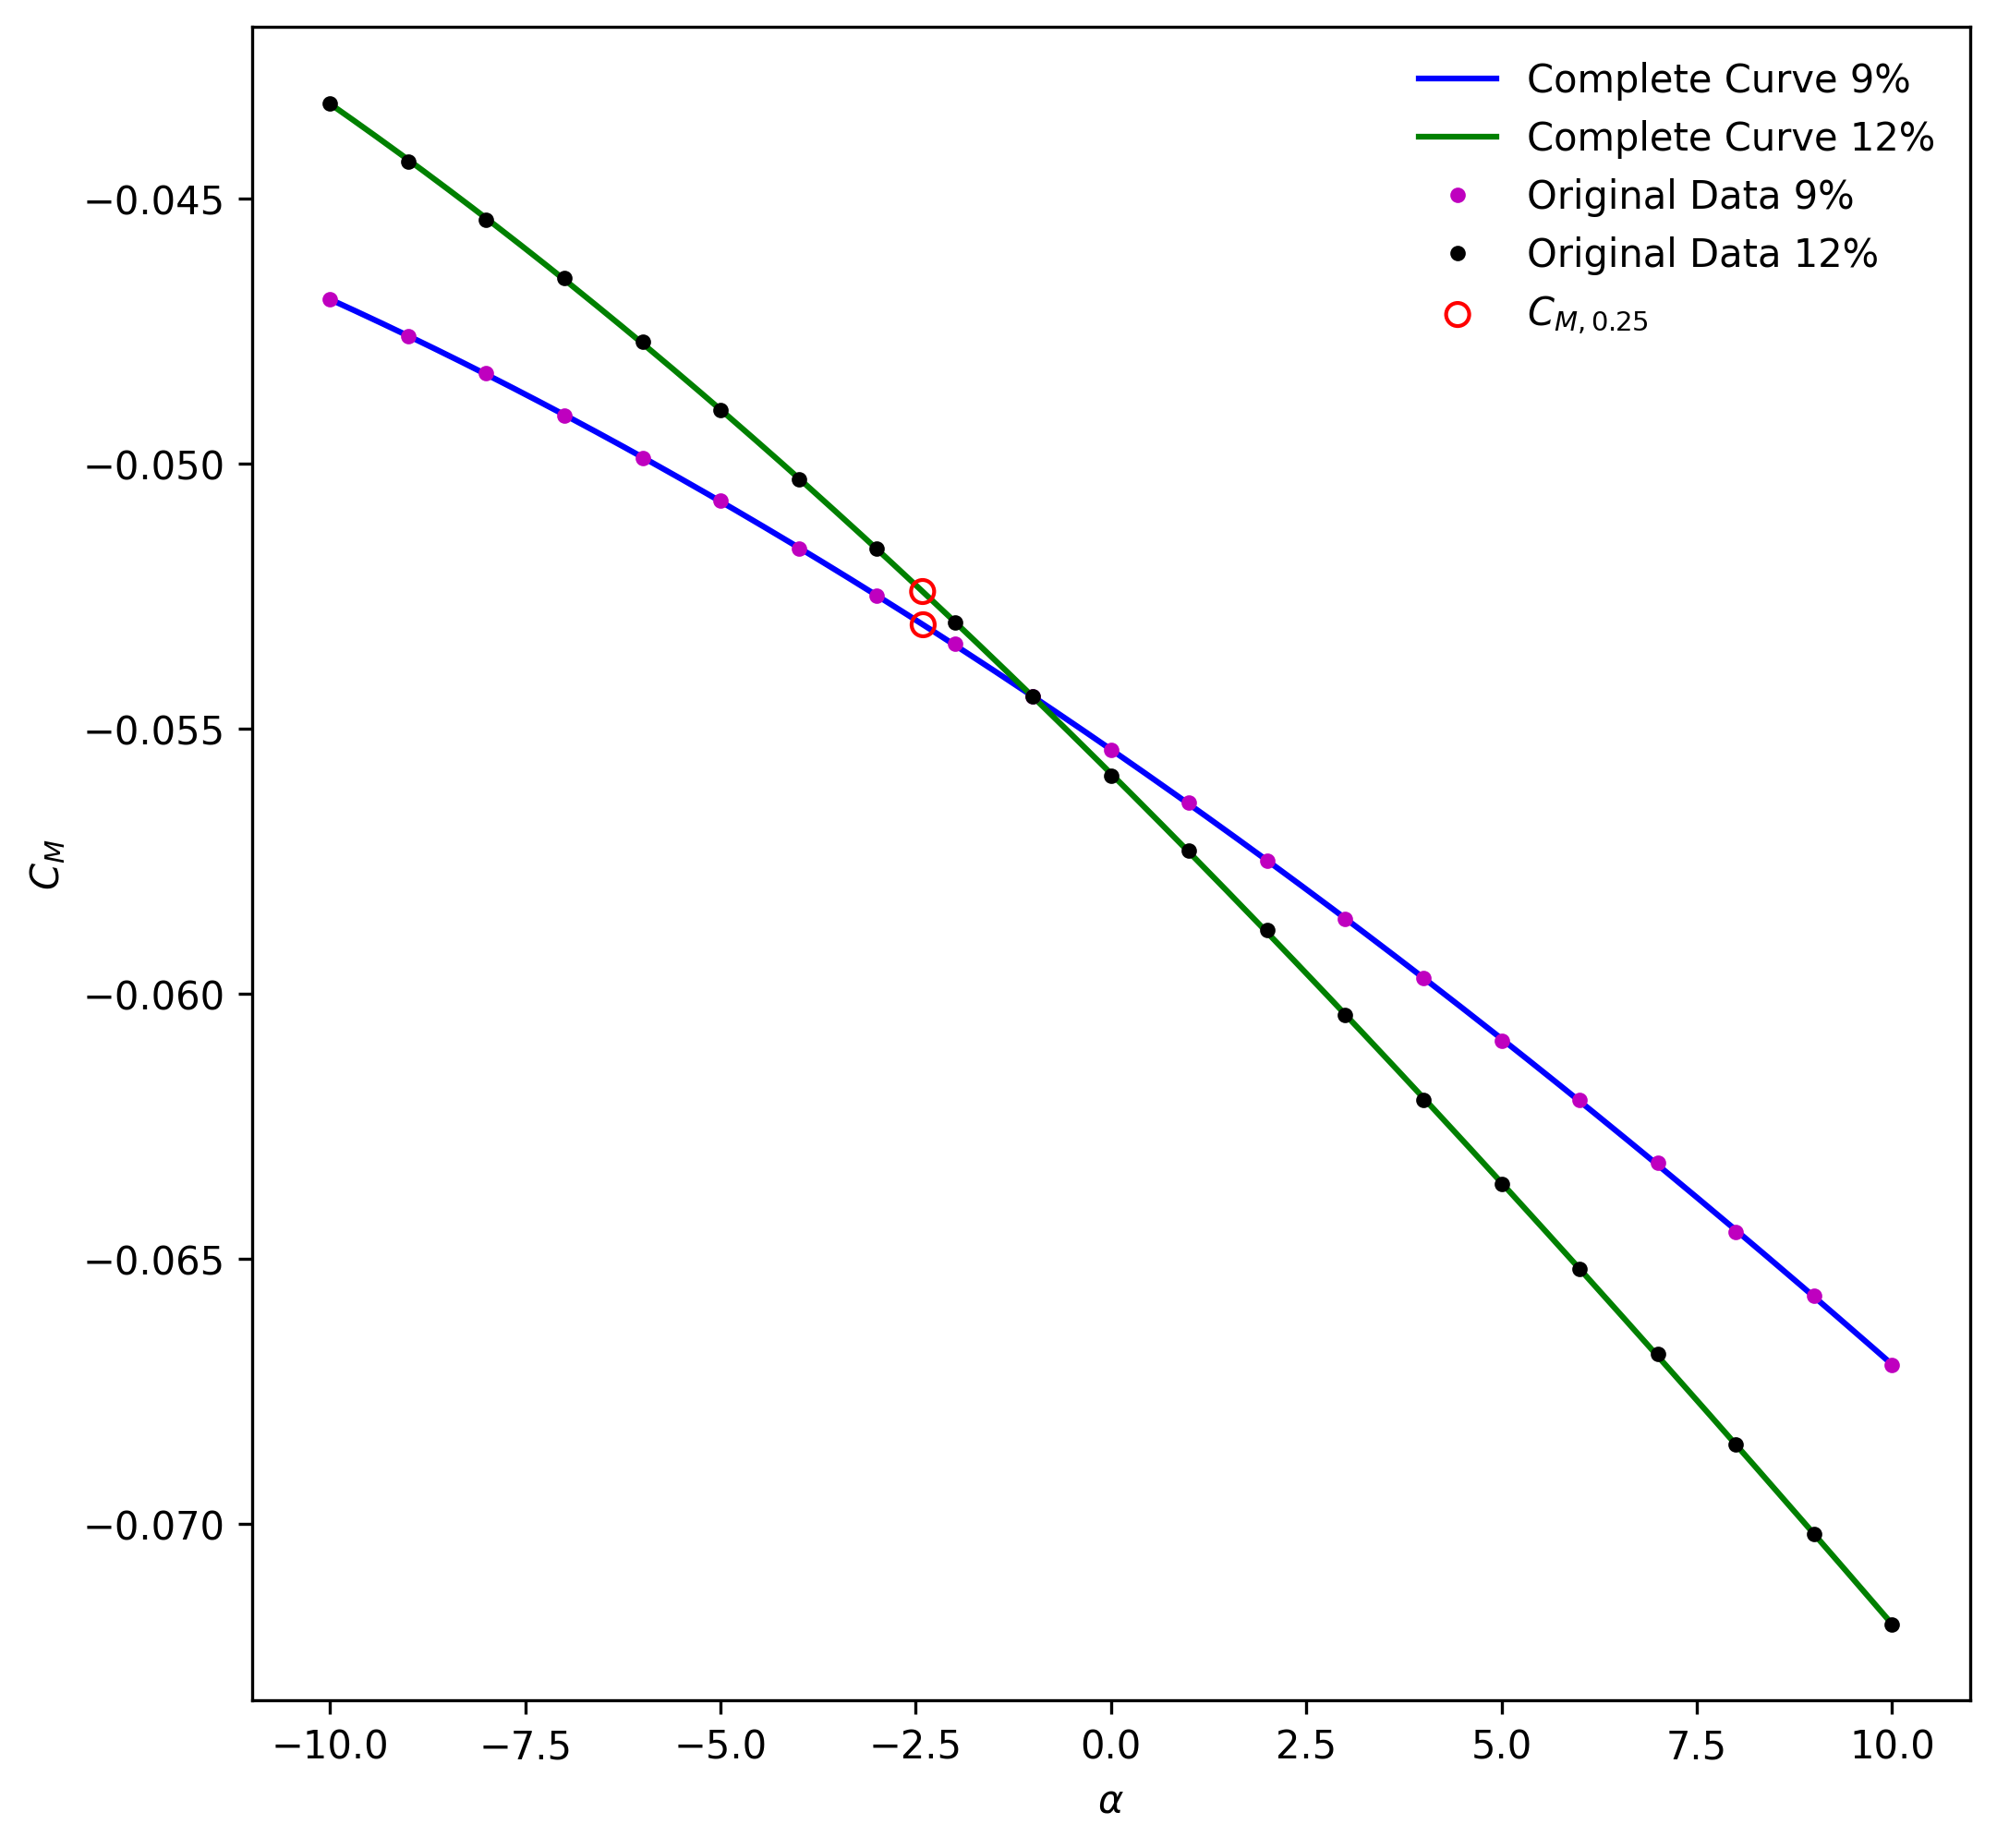

In [41]:
fig, ax = plt.subplots(figsize=(8,8), facecolor='white', dpi=300)
ax.plot(xnew, ynew_9, 'b', label='Complete Curve 9%')
ax.plot(xnew, ynew_12, 'g', label='Complete Curve 12%')
ax.plot(Data2209['alpha'], Data2209['CM'], 'mo', ms=3, label='Original Data 9%')
ax.plot(Data2212['alpha'], Data2212['CM'], 'ko', ms=3, label='Original Data 12%')
ax.scatter(alpha_zero_9,pitching_9, zorder=10, marker='o', edgecolors='r', facecolors='none', label='$C_{M,0.25}$')
ax.scatter(alpha_zero_12,pitching_12, zorder=10, marker='o', edgecolors='r', facecolors='none')

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('$C_M$')

ax.legend(frameon=False);

From the new complete curve we can consider the pitching moments at {{round(alpha_zero_9,3)}} degrees for the 9% thick aerofoil and {{round(alpha_zero_12,3)}} degrees for the 12% thick aerofoil. The results are a pitching moment of {{"%.4f" % pitching_9.item()}} and {{"%.4f" % pitching_12.item()}} for the 9% and 12% thick aerofoils. For reference, the quarter chord pitching moment from part one was -0.0539.